 # MODEL  TRAINING



In [1]:
# iMPORT Data and Required Packages
 # Importing Pandas,numpy,Matplotlib , seaborn, and Warings Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [8]:
df=pd.read_csv('C:/Users/pramod makwana/OneDrive/Desktop/new project/notebook/data/stud.csv')

# show top 5 record

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# preparing X and Y Variables

In [10]:
X =df.drop(columns=['math_score'],axis=1)

In [11]:
y=df['math_score']

In [12]:
# create column Transformer with 3 types of transformers 

num_feautures = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [
        ("oneHotEncoder",oh_transformer,cat_features),
        ("standardscaler",numeric_transformer,num_feautures),
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
# seprate dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape




((800, 19), (200, 19))

# Create an Evaluate Funcation to give all metrics after model Training

In [16]:
def evaluate_model(true, Predicted):
    mae= mean_absolute_error(true, Predicted)
    mse= mean_squared_error(true, Predicted)
    rmse = np.sqrt(mean_squared_error(true, Predicted))
    r2_square = r2_score(true, Predicted)
    return mae, rmse, r2_square


In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['model name', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,model name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,AdaBoost Regressor,0.854993
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850927
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.749957


# Linear Regression

In [28]:
lin_model =LinearRegression(fit_intercept=True)
lin_model =lin_model.fit(X_train, y_train)
y_pred =  lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 88.04


# plot y_pred and y_test

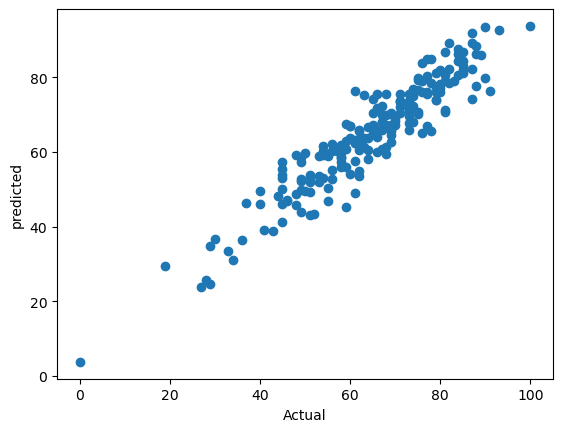

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual');
plt.ylabel('predicted');

<Axes: xlabel='math_score'>

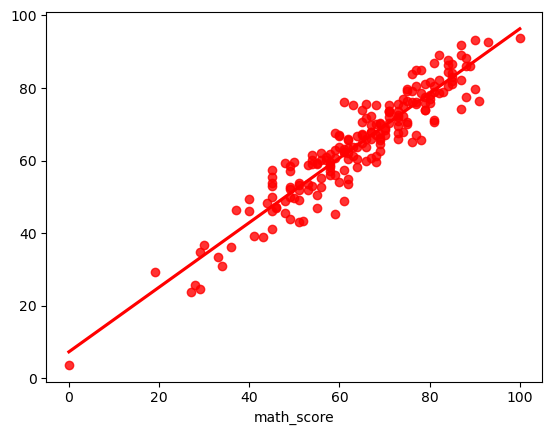

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

# Difference between Actual and Predicted Values

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred,'Difference':y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,77.987342
737,53,58.885970,56.875969
740,80,76.990265,77.526596
660,74,76.851804,76.521978
411,84,87.627378,83.226804
...,...,...,...
408,52,43.409149,46.894737
332,62,62.152214,59.258427
208,74,67.888395,68.038462
613,65,67.022287,68.636364
